# Hands-on Image Processing with Python
## Chapter 5: Image Enhancement using Derivatives

In [1]:
# Author: Sandipan Dey

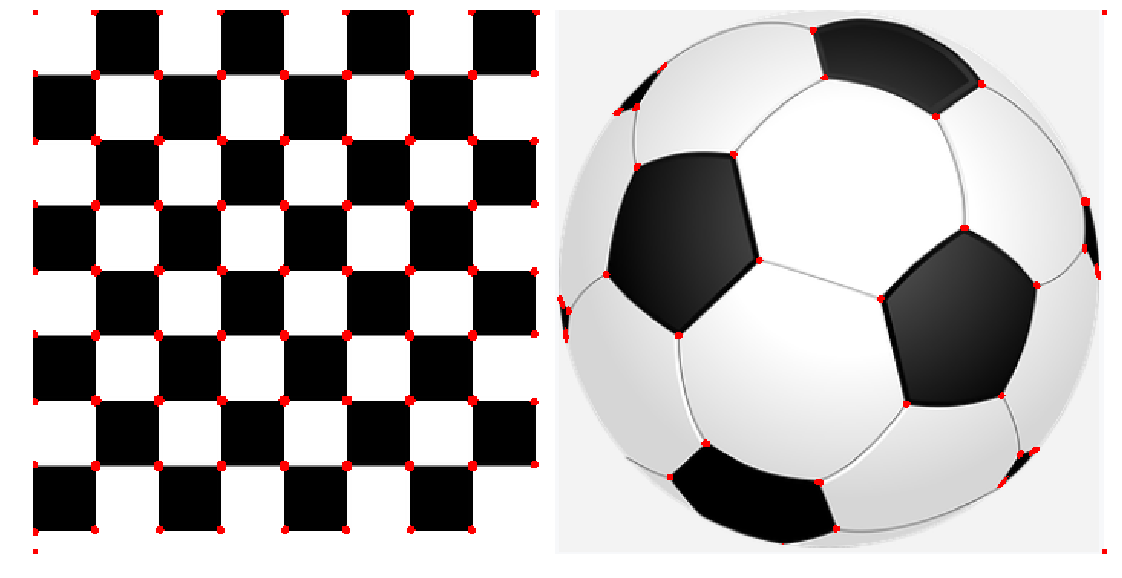

In [1]:
% matplotlib inline

from matplotlib import pylab as plt

from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import corner_harris, corner_subpix, corner_peaks, peak_local_max, corner_kitchen_rosenfeld
from skimage.morphology import dilation, disk
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse
import numpy as np

image = imread('../new images/chess.png') # RGBA image
image_gray = rgb2gray(image)
coords = corner_harris(image_gray, k =0.001) 
image[coords>0.01*coords.max()]=[255,0,0,255]
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.axis('off')
plt.show()

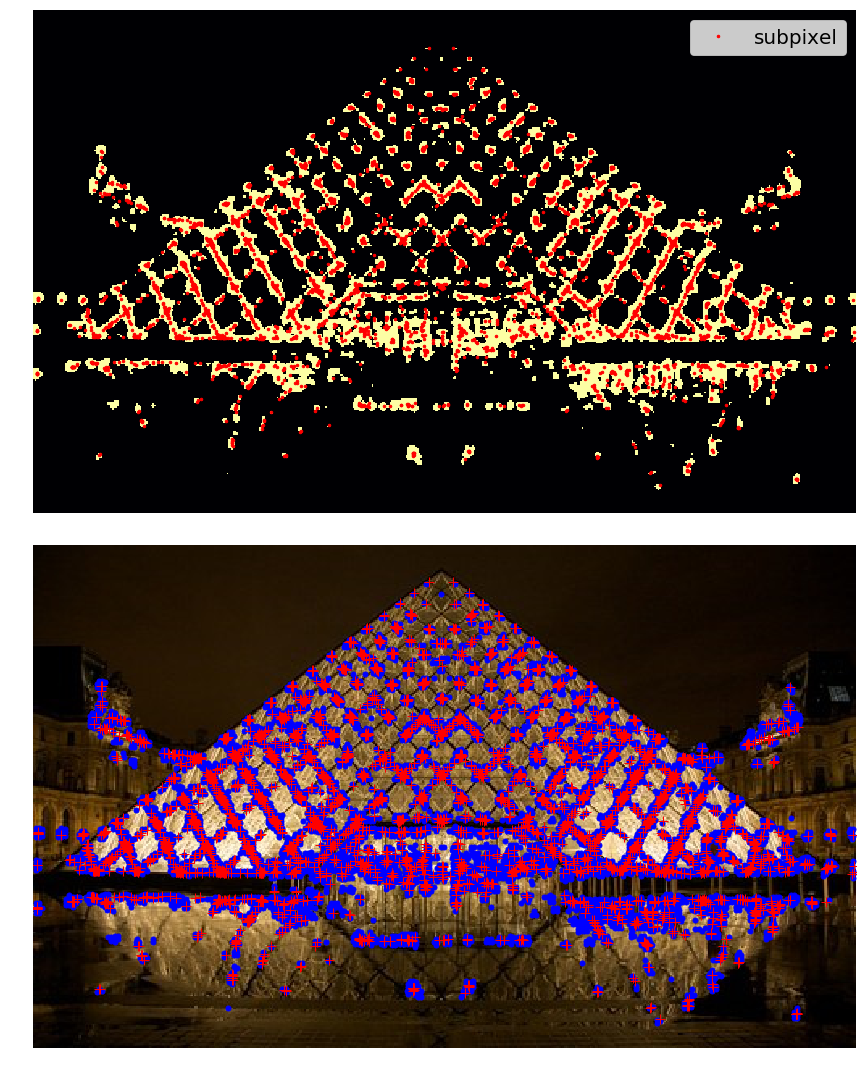

In [4]:
image = imread('../new images/pyramids2.jpg')
image_gray = rgb2gray(image)

coords = corner_harris(image_gray, k =0.001)
coords[coords > 0.01*coords.max()] = 255
c_coords = corner_peaks(coords)
coords_subpix = corner_subpix(image_gray, c_coords, window_size=11)

plt.figure(figsize=(15,15))
plt.subplot(211) 
plt.imshow(coords, cmap='inferno')
plt.plot(coords_subpix[:, 1], coords_subpix[:, 0], 'r.', markersize=5, label='subpixel')
plt.legend(prop={'size': 20})
plt.axis('off')
plt.subplot(212) 
plt.imshow(image, interpolation='nearest')
plt.plot(c_coords[:, 1], c_coords[:, 0], 'bo', markersize=5)
plt.plot(coords_subpix[:, 1], coords_subpix[:, 0], 'r+', markersize=10)
plt.axis('off')
plt.tight_layout()
plt.show()

#coords = np.clip(corner_kitchen_rosenfeld(image),0,1)
#fig, ax = plt.subplots(figsize=(15,15))
#ax.imshow(image + coords, interpolation='nearest', cmap=plt.cm.gray)
#plt.show()

In [ ]:
from __future__ import division, print_function
from time import time

import numpy as np
import matplotlib.pyplot as plt

from dask import delayed

from skimage.io import imread

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from skimage.transform import integral_image
from skimage.feature import haar_like_feature
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature

@delayed
def extract_feature_image(img, feature_type, feature_coord=None):
    """Extract the haar feature for the current image"""
    ii = integral_image(img)
    return haar_like_feature(ii, 0, 0, ii.shape[0], ii.shape[1],
                             feature_type=feature_type,
                             feature_coord=feature_coord)

img = imread('../my images/me2.jpg')
# For speed, only extract the two first types of features
feature_types = ['type-2-x', 'type-2-y']

# Build a computation graph using dask. This allows using multiple CPUs for
# the computation step
X = delayed(extract_feature_image(img, feature_types)
            for img in images)
# Compute the result using the "processes" dask backend
t_start = time()
X = np.array(X.compute(scheduler='processes'))
time_full_feature_comp = time() - t_start
y = np.array([1] * 100 + [0] * 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=150,
                                                    random_state=0,
                                                    stratify=y)

# Extract all possible features to be able to select the most salient.
feature_coord, feature_type = \
        haar_like_feature_coord(width=images.shape[2], height=images.shape[1],
                                feature_type=feature_types)

In [ ]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


img1 = rgb2gray(data.astronaut())
img2 = tf.rotate(img1, 180)
tform = tf.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                           translation=(0, -200))
img3 = tf.warp(img1, tform)

descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

fig, ax = plt.subplots(nrows=2, ncols=1)

plt.gray()

plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
ax[0].axis('off')
ax[0].set_title("Original Image vs. Transformed Image")

plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)
ax[1].axis('off')
ax[1].set_title("Original Image vs. Transformed Image")


plt.show()

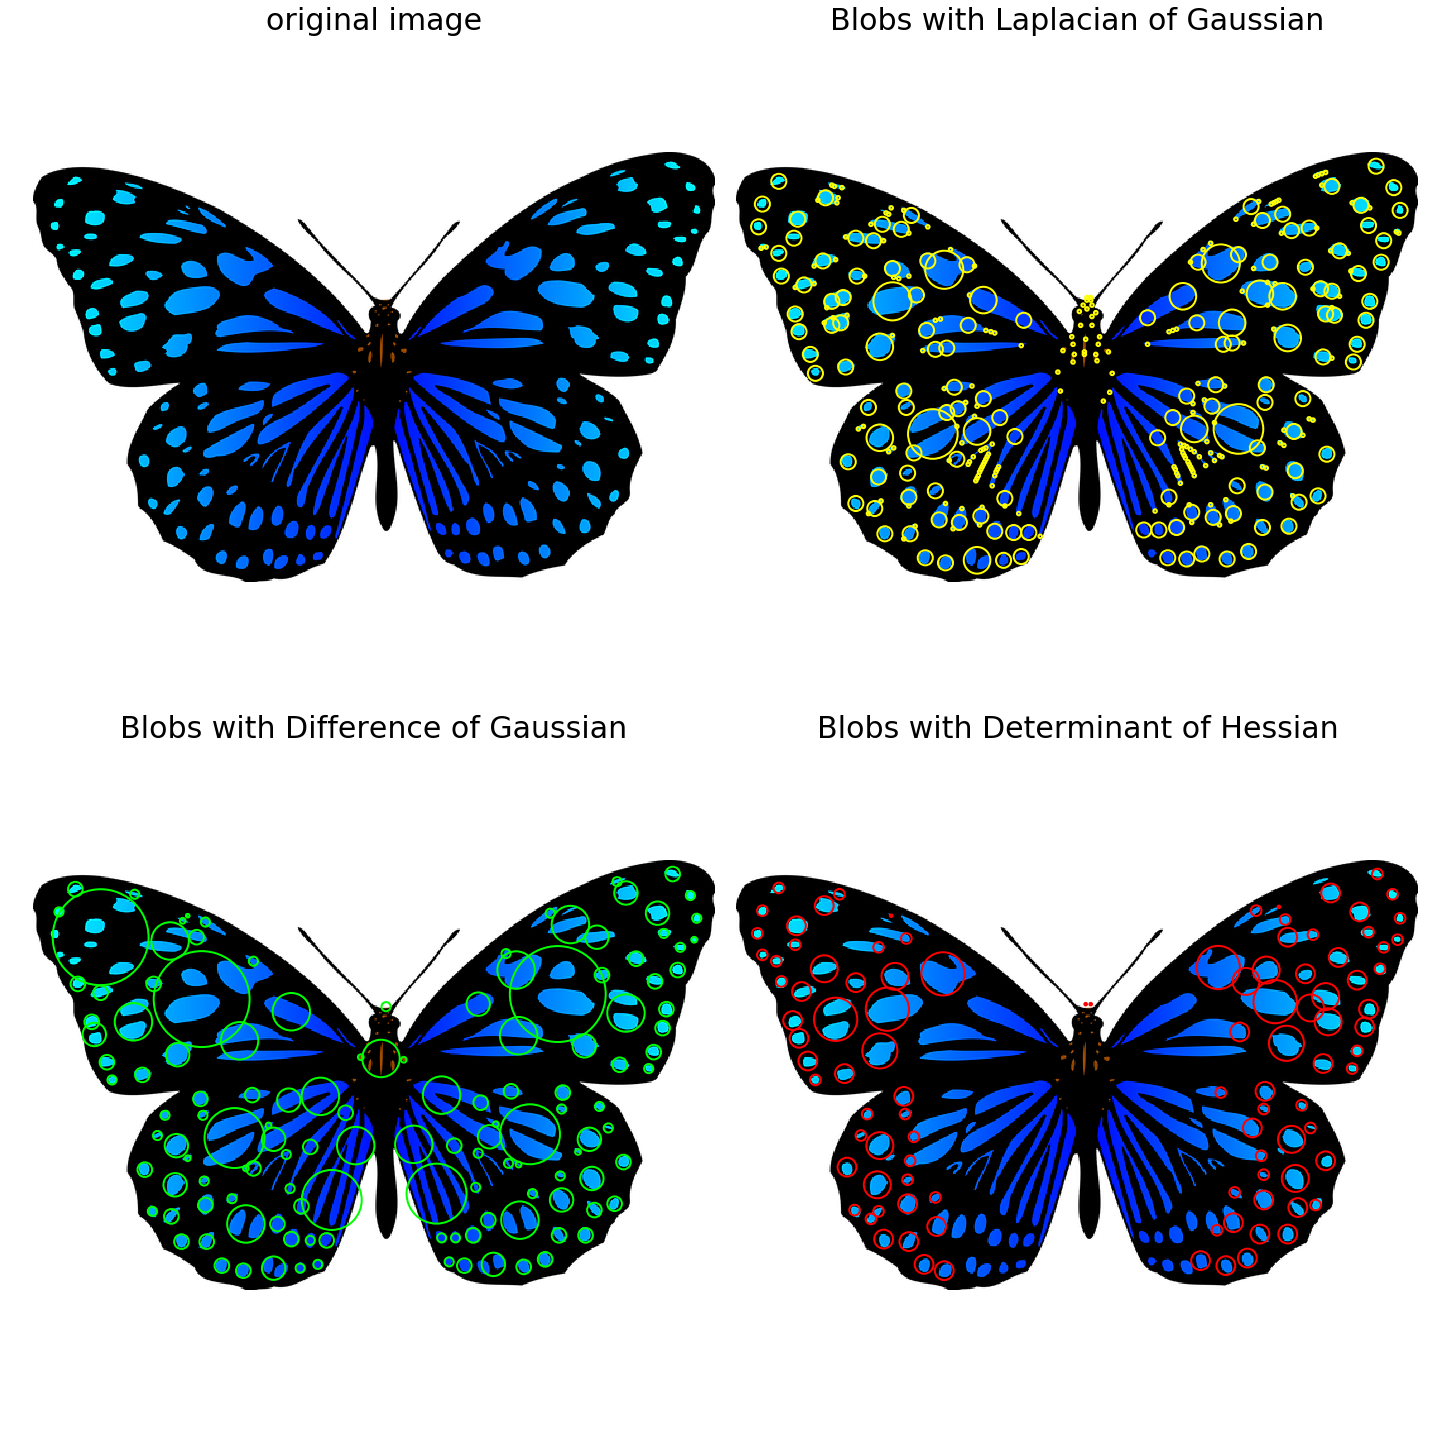

In [56]:
from numpy import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh
import matplotlib.pylab as pylab

im = imread('../new images/butterfly.png') 
im_gray = rgb2gray(im)
log_blobs = blob_log(im_gray, max_sigma=30, num_sigma=10, threshold=.1)
log_blobs[:, 2] = sqrt(2) * log_blobs[:, 2] # Compute radius in the 3rd column.
dog_blobs = blob_dog(im_gray, max_sigma=30, threshold=0.1)
dog_blobs[:, 2] =  sqrt(2) * dog_blobs[:, 2]
doh_blobs = blob_doh(im_gray, max_sigma=30, threshold=0.005)
list_blobs = [log_blobs, dog_blobs, doh_blobs]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']
sequence = zip(list_blobs, colors, titles)
fig, axes = pylab.subplots(2, 2, figsize=(20, 20), sharex=True, sharey=True)
axes = axes.ravel()
axes[0].imshow(im, interpolation='nearest')
axes[0].set_title('original image', size=30)
axes[0].set_axis_off()
for idx, (blobs, color, title) in enumerate(sequence):
 axes[idx+1].imshow(im, interpolation='nearest')
 axes[idx+1].set_title('Blobs with ' + title, size=30)
 for blob in blobs:
   y, x, r = blob
   c = pylab.Circle((x, y), r, color=color, linewidth=2, fill=False)
   axes[idx+1].add_patch(c)
   axes[idx+1].set_axis_off()
pylab.tight_layout()
pylab.show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in true_divide


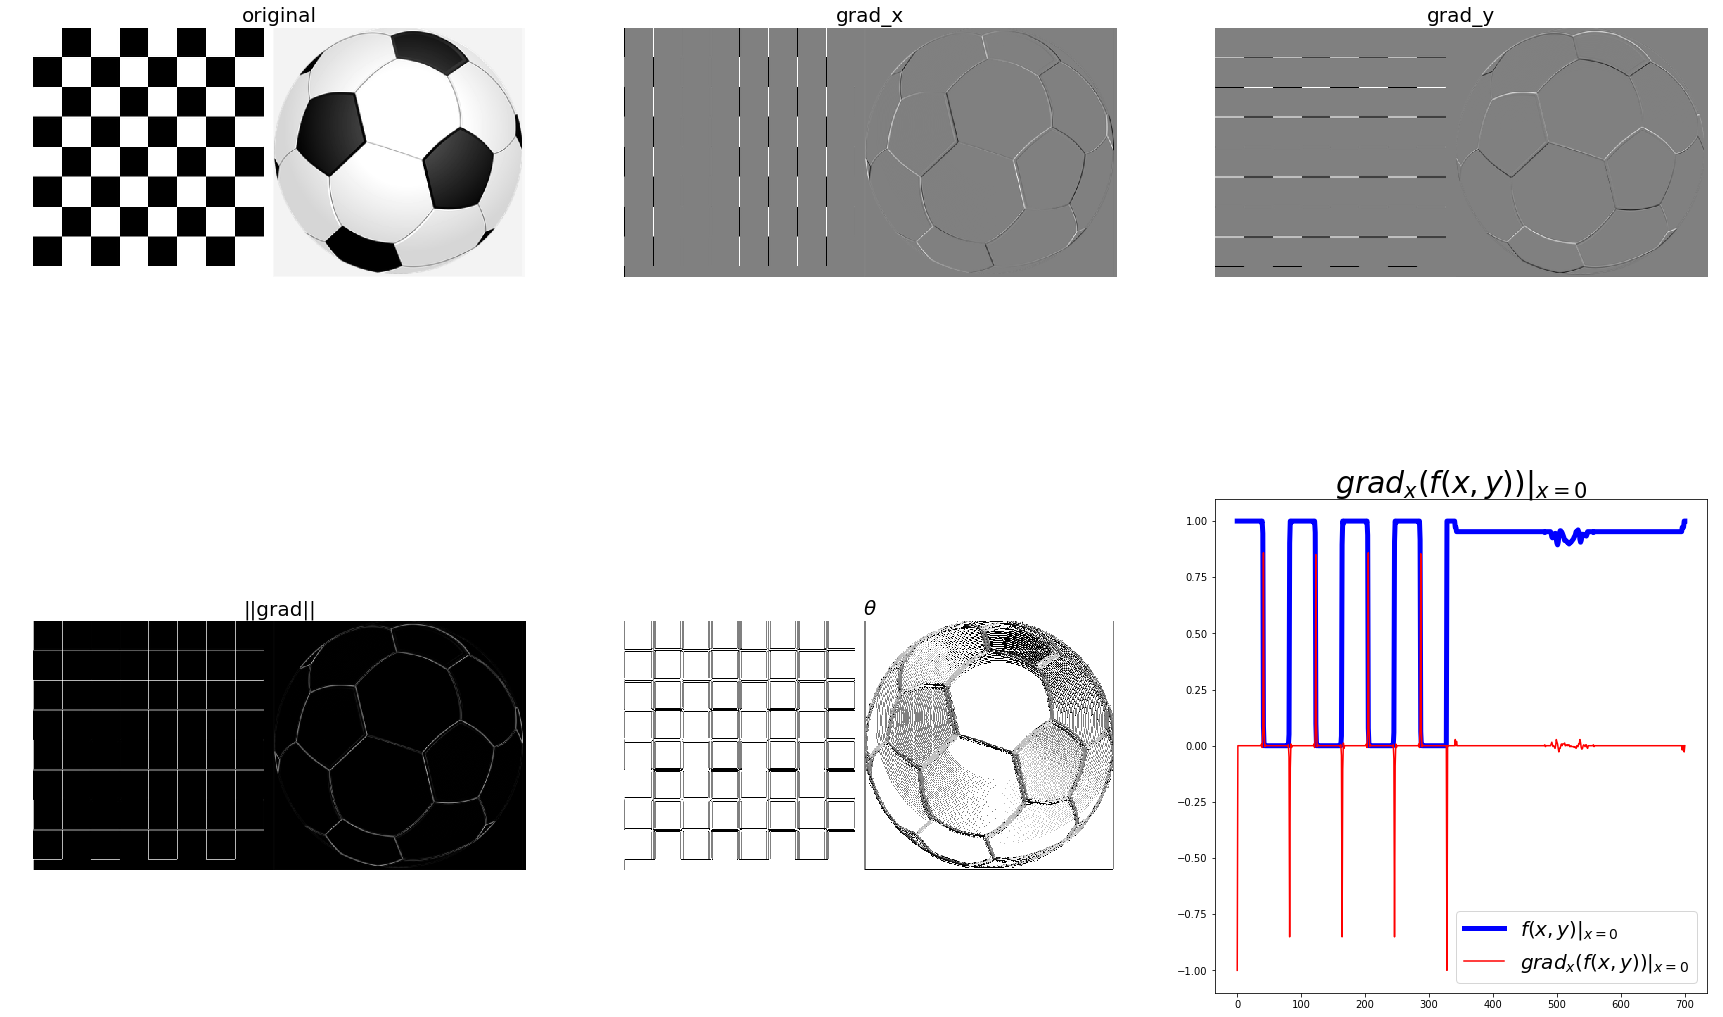

In [98]:
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab

def plot_image(image, title):
 pylab.imshow(image)
 pylab.title(title, size=20)
 pylab.axis('off')

ker_x = [[-1, 1]]
ker_y = [[-1], [1]]
im = rgb2gray(imread('../new images/chess.png'))
im_x = signal.convolve2d(im, ker_x, mode='same')
im_y = signal.convolve2d(im, ker_y, mode='same')
im_mag = np.sqrt(im_x**2 + im_y**2)
im_dir = np.arctan(im_y/im_x)
pylab.gray()
pylab.figure(figsize=(30,20))
pylab.subplot(231)
plot_image(im, 'original')
pylab.subplot(232)
plot_image(im_x, 'grad_x')
pylab.subplot(233)
plot_image(im_y, 'grad_y')
pylab.subplot(234)
plot_image(im_mag, '||grad||')
pylab.subplot(235)
plot_image(im_dir, r'$\theta$')
pylab.subplot(236)
pylab.plot(range(im.shape[1]), im[0,:], 'b-', label=r'$f(x,y)|_{x=0}$', linewidth=5)
pylab.plot(range(im.shape[1]), im_x[0,:], 'r-', label=r'$grad_x (f(x,y))|_{x=0}$')
pylab.title(r'$grad_x (f(x,y))|_{x=0}$', size=30)
pylab.legend(prop={'size': 20})
pylab.show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel\__main__.py:62: RuntimeWarning: overflow encountered in longlong_scalars
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel\__main__.py:63: RuntimeWarning: overflow encountered in longlong_scalars


(0.8, 0.9) [ 120.  -20.] 0.09999999999999999
(0.8982412101241938, 0.8072777593937368) [ -20.45123966  114.92297156] -0.10225420334222493
(0.9001524425730119, 0.8000362790749188) [ -19.87491292  119.83016533] -0.09990858564132575


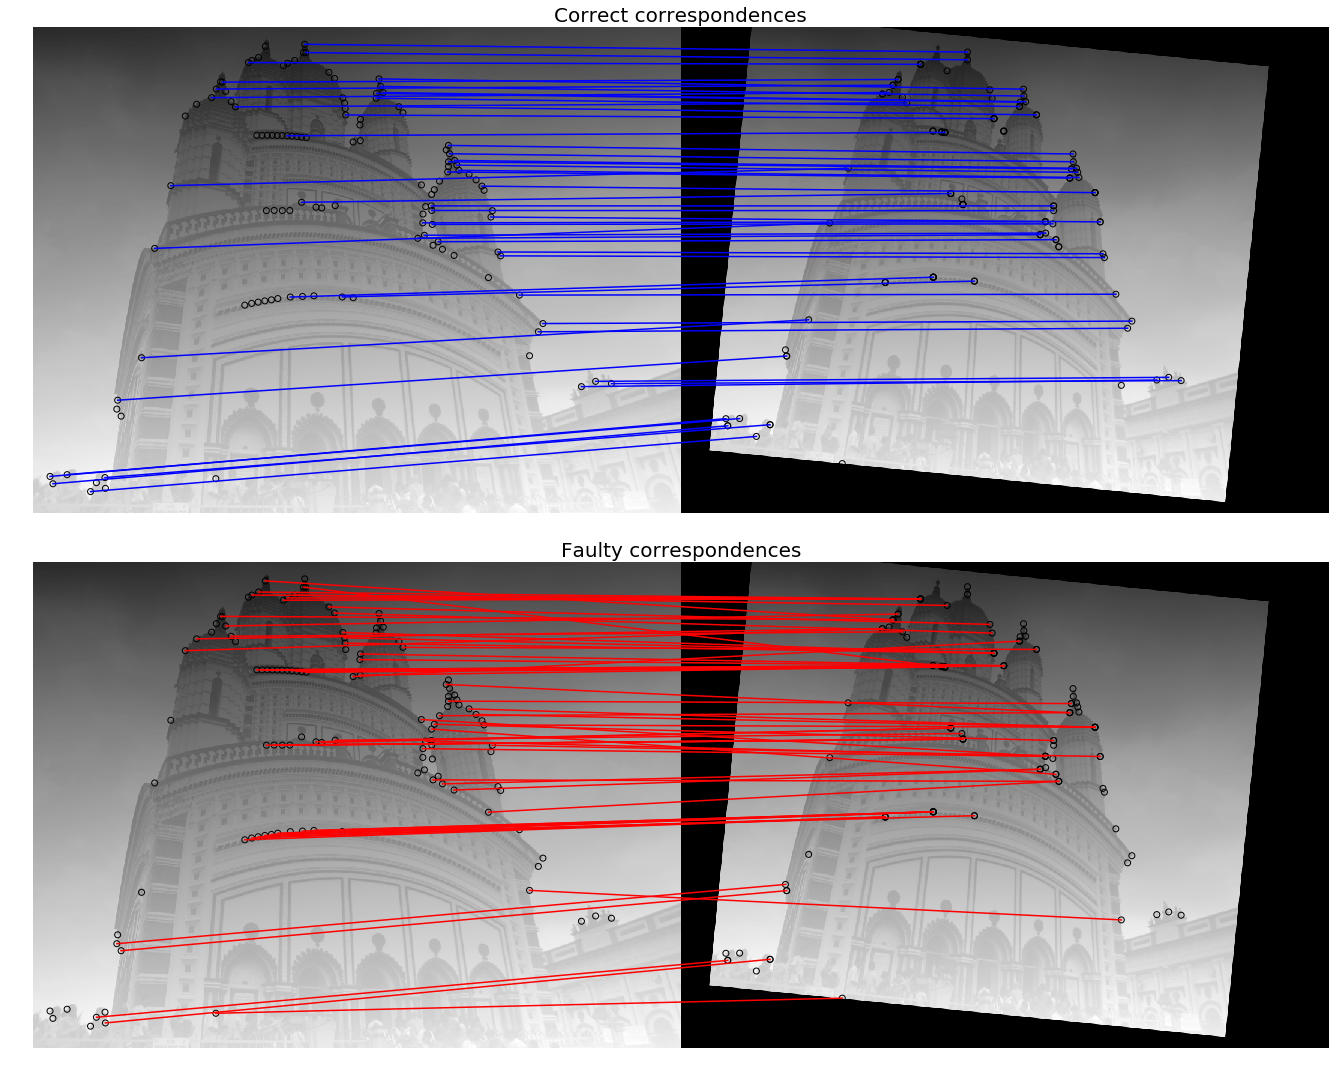

In [273]:
import numpy as np
from matplotlib import pyplot as plt

from skimage import data
from skimage.util import img_as_float
from skimage.feature import (corner_harris, corner_subpix, corner_peaks, plot_matches)
from skimage.transform import warp, SimilarityTransform, AffineTransform, resize
from skimage.exposure import rescale_intensity
from skimage.color import rgb2gray
from skimage.measure import ransac

# generate synthetic checkerboard image and add gradient for the later matching
book = rgb2gray(img_as_float(imread('../my images/temple.jpg')))
#book = img_as_float(data.checkerboard())
img_orig = np.zeros(list(book.shape) + [3])
img_orig[..., 0] = book
gradient_r, gradient_c = (np.mgrid[0:img_orig.shape[0],
                                   0:img_orig.shape[1]]
                          / float(img_orig.shape[0]))
img_orig[..., 1] = gradient_r
img_orig[..., 2] = gradient_c
img_orig = rescale_intensity(img_orig)
img_orig_gray = rgb2gray(img_orig)

# warp synthetic image
#shift_y, shift_x = np.array(img_orig.shape[:2]) / 2.
#tf_rotate = SimilarityTransform(rotation=np.deg2rad(30))
#tf_shift = SimilarityTransform(translation=[-shift_x, -shift_y])
#tf_shift_inv = SimilarityTransform(translation=[shift_x, shift_y])

#img_warped = warp(img_orig, (tf_shift + (tf_rotate + tf_shift_inv)).inverse, output_shape=img_orig.shape)

tform = AffineTransform(scale=(0.8, 0.9), rotation=0.1, translation=(120, -20))
img_warped = warp(img_orig, tform.inverse, output_shape=img_orig.shape)
img_warped_gray = rgb2gray(img_warped)

# extract corners using Harris' corner measure
coords = corner_harris(img_orig_gray)
coords[coords > 0.01*coords.max()] = 1
coords_orig = corner_peaks(coords, threshold_rel=0.0001,
                           min_distance=5)
coords = corner_harris(img_warped_gray)
coords[coords > 0.01*coords.max()] = 1
coords_warped = corner_peaks(coords,
                             threshold_rel=0.0001, min_distance=5)

# determine sub-pixel corner position
coords_orig_subpix = corner_subpix(img_orig_gray, coords_orig, window_size=9)
coords_warped_subpix = corner_subpix(img_warped_gray, coords_warped, window_size=9)

def gaussian_weights(window_ext, sigma=1):
    y, x = np.mgrid[-window_ext:window_ext+1, -window_ext:window_ext+1]
    g = np.zeros(y.shape, dtype=np.double)
    g[:] = np.exp(-0.5 * (x**2 / sigma**2 + y**2 / sigma**2))
    g /= 2 * np.pi * sigma * sigma
    return g


def match_corner(coord, window_ext=3):
    r, c = np.round(coord).astype(np.intp)
    #print(r, c, img_orig.shape)
    window_orig = img_orig[r-window_ext:r+window_ext+1,
                           c-window_ext:c+window_ext+1, :]

    # weight pixels depending on distance to center pixel
    weights = gaussian_weights(window_ext, 3)
    weights = np.dstack((weights, weights, weights))

    # compute sum of squared differences to all corners in warped image
    SSDs = []
    for cr, cc in coords_warped:
        #if cr-window_ext > coords_warped.shape[0] or cr-window_ext < coords_warped.shape[1]: continue
        #print(cr, cc)
        window_warped = img_warped[cr-window_ext:cr+window_ext+1,
                                   cc-window_ext:cc+window_ext+1, :]
        if window_orig.shape == window_warped.shape:
            SSD = np.sum(weights * (window_orig - window_warped)**2)
            SSDs.append(SSD)

    # use corner with minimum SSD as correspondence
    min_idx = np.argmin(SSDs) if len(SSDs) > 0 else -1
    return coords_warped_subpix[min_idx] if min_idx >= 0 else [None]


# find correspondences using simple weighted sum of squared differences
src = []
dst = []
for coord in coords_orig_subpix:
    coord1 = match_corner(coord)
    if any(coord1) and len(coord1) > 0 and not all(np.isnan(coord1)):
        src.append(coord)
        dst.append(coord1)
src = np.array(src)
dst = np.array(dst)
#print(dst)


# estimate affine transform model using all coordinates
model = AffineTransform()
model.estimate(src, dst)

# robustly estimate affine transform model with RANSAC
model_robust, inliers = ransac((src, dst), AffineTransform, min_samples=3,
                               residual_threshold=2, max_trials=100)
outliers = inliers == False


# compare "true" and estimated transform parameters
print(tform.scale, tform.translation, tform.rotation)
print(model.scale, model.translation, model.rotation)
print(model_robust.scale, model_robust.translation, model_robust.rotation)

# visualize correspondence
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

plt.gray()

inlier_idxs = np.nonzero(inliers)[0]
plot_matches(ax[0], img_orig_gray, img_warped_gray, src, dst,
             np.column_stack((inlier_idxs, inlier_idxs)), matches_color='b')
ax[0].axis('off')
ax[0].set_title('Correct correspondences', size=20)

outlier_idxs = np.nonzero(outliers)[0]
plot_matches(ax[1], img_orig_gray, img_warped_gray, src, dst,
             np.column_stack((outlier_idxs, outlier_idxs)), matches_color='r')
ax[1].axis('off')
ax[1].set_title('Faulty correspondences', size=20)

fig.tight_layout()

plt.show()

In [ ]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_peaks, corner_harris,
                             plot_matches, BRIEF)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


img1 = rgb2gray(data.astronaut())
tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img2 = tf.warp(img1, tform)
img3 = tf.rotate(img1, 25)

keypoints1 = corner_peaks(corner_harris(img1), min_distance=5)
keypoints2 = corner_peaks(corner_harris(img2), min_distance=5)
keypoints3 = corner_peaks(corner_harris(img3), min_distance=5)

extractor = BRIEF()

extractor.extract(img1, keypoints1)
keypoints1 = keypoints1[extractor.mask]
descriptors1 = extractor.descriptors

extractor.extract(img2, keypoints2)
keypoints2 = keypoints2[extractor.mask]
descriptors2 = extractor.descriptors

extractor.extract(img3, keypoints3)
keypoints3 = keypoints3[extractor.mask]
descriptors3 = extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

fig, ax = plt.subplots(nrows=2, ncols=1)

plt.gray()

plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
ax[0].axis('off')
ax[0].set_title("Original Image vs. Transformed Image")

plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)
ax[1].axis('off')
ax[1].set_title("Original Image vs. Transformed Image")


plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature
images = [np.zeros((2, 2)), np.zeros((2, 2)),
          np.zeros((3, 3)), np.zeros((3, 3)),
          np.zeros((2, 2))]

feature_types = ['type-2-x', 'type-2-y',
                 'type-3-x', 'type-3-y',
                 'type-4']

fig, axs = plt.subplots(3, 2)
for ax, img, feat_t in zip(np.ravel(axs), images, feature_types):
    coord, _ = haar_like_feature_coord(img.shape[0], img.shape[1], feat_t)
    haar_feature = draw_haar_like_feature(img, 0, 0,
                                          img.shape[0],
                                          img.shape[1],
                                          coord,
                                          max_n_features=1,
                                          random_state=0)
    ax.imshow(haar_feature)
    ax.set_title(feat_t)
    ax.set_axis_off()

fig.suptitle('The different Haar-like feature descriptors')
plt.show()